In [ ]:
import import_ipynb
%run 03-EDA.ipynb


### Imports

In [2]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier



import statsmodels.api as sm

<a id="8"></a>
# <div style="padding:20px;color:white;margin:0;color:darkgreen;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#f2ffe6;overflow:hidden">8. | Model Development: CDC Data: Random Forest</div>

### Selected Features

In [3]:
selected_features_cdc_data = ['HighBP', 'HighChol', 'BMI', 'PhysActivity', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',  'Age', 'Education' ,'Income']

<a id="8.1"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">8.1 | Model Development: CDC Data: Random Forest: First Iteration</div>

### Split Features and Target

In [4]:
X = cdc_data[selected_features_cdc_data]
y = cdc_data['Diabetes_binary']

### Split Train and Test Dataset

In [5]:
X_train,X_test,y_train,y_test=  train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(202944, 11) (202944,)
(50736, 11) (50736,)


#### Train with Random Forest

In [6]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

### Predict Using Random Forest

In [7]:

predictions_train_rf = model_rf.predict(X_train)
predictions_test_rf  = model_rf.predict(X_test)

### Random Forest: Significant Variables

         Feature  Importance
2            BMI    0.225033
8            Age    0.148147
10        Income    0.126477
6       PhysHlth    0.113398
5       MentHlth    0.087864
9      Education    0.087281
4        GenHlth    0.077513
0         HighBP    0.049968
3   PhysActivity    0.030264
7       DiffWalk    0.028381
1       HighChol    0.025674


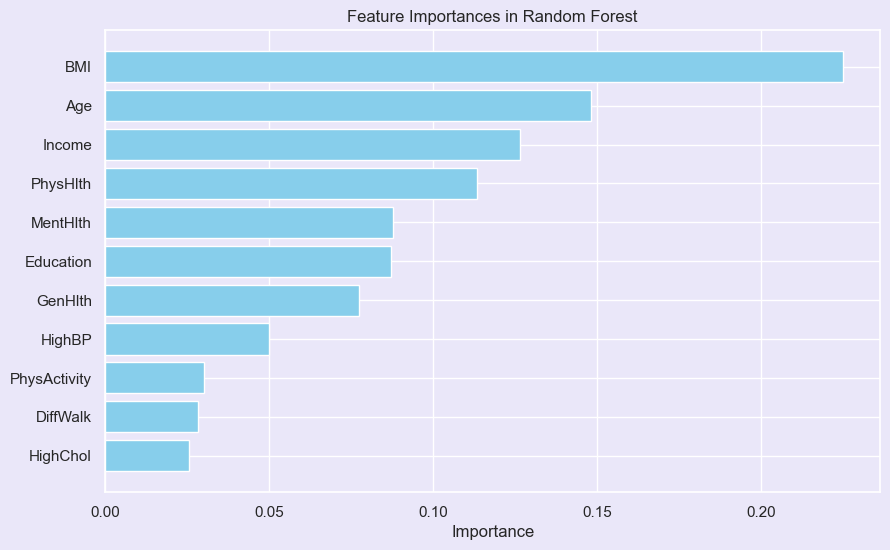

In [8]:
# Extract feature importances
feature_importances = model_rf.feature_importances_

# Get feature names (assuming X is a DataFrame)
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances in Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()

### RF: Feature Importance and Interpretation

Key Influencers: 

BMI, Age, and Income are identified as the top three significant features, 

indicating that these factors are critical in the decision-making process of the model.


Moderate Factors: 

Features like PhysHlth, MentHlth, and Education provide additional predictive power but are not as influential as the top features.


Less Influential Features: 

HighBP, PhysActivity, DiffWalk, and HighChol have lower importance scores, indicating they are less critical in this model's predictions.

 
Implications:
 
Feature Selection: 

Focus on BMI, Age, and Income for further analysis, feature engineering, or interventions, as they hold the most predictive power.

Model Insights: 

The feature importances offer insights into the underlying patterns in the data, guiding decisions in healthcare or related fields.


Potential Actions: 

Consider whether less important features should be included, removed, 

or further examined for interactions or transformations to improve model performance.

#### Plot Confusion Matrix For Random Forest

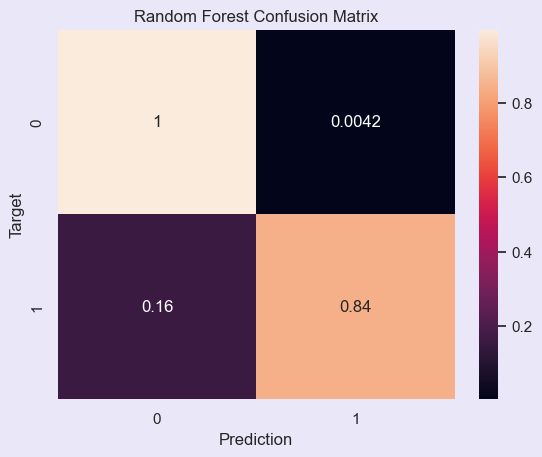

In [9]:
cf_rf = confusion_matrix(y_train, predictions_train_rf, normalize='true')
plt.figure()
sns.heatmap(cf_rf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format("Random Forest"))
plt.show()

#### Calculate Evaluation Metrics for Random Forest

In [10]:
# Training set performance
rf_train_accuracy = accuracy_score(y_train, predictions_train_rf) # Calculate Accuracy
rf_train_f1 = f1_score(y_train, predictions_train_rf) # Calculate F1-score
rf_train_precision = precision_score(y_train, predictions_train_rf) # Calculate Precision
rf_train_recall = recall_score(y_train, predictions_train_rf) # Calculate Recall
rf_train_rocauc_score = roc_auc_score(y_train, predictions_train_rf)
rf_train_log_loss_value = log_loss(y_train, predictions_train_rf)


# Test set performance
rf_test_accuracy = accuracy_score(y_test, predictions_test_rf) # Calculate Accuracy
rf_test_f1 = f1_score(y_test, predictions_test_rf) # Calculate F1-score
rf_test_precision = precision_score(y_test, predictions_test_rf) # Calculate Precision
rf_test_recall = recall_score(y_test, predictions_test_rf) # Calculate Recall
rf_test_rocauc_score = roc_auc_score(y_test, predictions_test_rf) #Calculate Roc
rf_test_log_loss_value = log_loss(y_test, predictions_test_rf)

print('RF: Model performance for Training set')
print("- Accuracy: {:.4f}".format(rf_train_accuracy))
print('- F1 score: {:.4f}'.format(rf_train_f1))
print('- Precision: {:.4f}'.format(rf_train_precision))
print('- Recall: {:.4f}'.format(rf_train_recall))
print('- Roc Auc Score: {:.4f}'.format( rf_train_rocauc_score))
print('- Log Loss: {:.4f}'.format(rf_train_log_loss_value))

    
    
print('----------------------------------')
    
print('RF: Model performance for Test set')
print('- Accuracy: {:.4f}'.format(rf_test_accuracy))
print('- F1 score: {:.4f}'.format(rf_test_f1))
print('- Precision: {:.4f}'.format(rf_test_precision))
print('- Recall: {:.4f}'.format(rf_test_recall))
print('- Roc Auc Score: {:.4f}'.format(rf_test_rocauc_score))
print('- Log Loss: {:.4f}'.format(rf_test_log_loss_value))

    
print('='*35)
print('\n')

RF: Model performance for Training set
- Accuracy: 0.9745
- F1 score: 0.9024
- Precision: 0.9701
- Recall: 0.8436
- Roc Auc Score: 0.9197
- Log Loss: 0.9187
----------------------------------
RF: Model performance for Test set
- Accuracy: 0.8522
- F1 score: 0.2794
- Precision: 0.4263
- Recall: 0.2078
- Roc Auc Score: 0.5815
- Log Loss: 5.3281




#### RF: Classification Report


In [11]:
cm_rf_train = classification_report(y_train,predictions_train_rf)

print('Random Forest Model: Train\n')
print(cm_rf_train)

cm_rf_test = classification_report(y_test,predictions_test_rf)

print('Random Forest Model: Test\n')
print(cm_rf_test)

Random Forest Model: Train

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    174595
         1.0       0.97      0.84      0.90     28349

    accuracy                           0.97    202944
   macro avg       0.97      0.92      0.94    202944
weighted avg       0.97      0.97      0.97    202944

Random Forest Model: Test

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     43739
         1.0       0.43      0.21      0.28      6997

    accuracy                           0.85     50736
   macro avg       0.65      0.58      0.60     50736
weighted avg       0.82      0.85      0.83     50736



#### RF: N-fold cross-validation

In [12]:
n_splits = 5

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

X = cdc_data[selected_features_cdc_data]
y = cdc_data['Diabetes_binary']

model_rf = RandomForestClassifier()

# Arrays to store accuracy scores
training_accuracies = []
testing_accuracies = []

# Arrays to store f1 scores
training_f1 = []
testing_f1 = []

# Arrays to store Precision scores
training_precision = []
testing_precision = []

# Arrays to store Recall scores
training_recall = []
testing_recall = []

# Arrays to store RO-AUC scores
training_rocauc_score = []
testing_rocauc_score = []

# Arrays to store Log Loss scores
training_log_loss_value = []
testing_log_loss_value = []

# Perform cross-validation
for train_index, test_index in skf.split(X, y):
    # Split the data into training and test sets for this fold
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model_rf.fit(X_train_kfold, y_train_kfold)
    
    # Predict on training and test data
    pred_train_rf_kfold = model_rf.predict(X_train_kfold)
    pred_test_rf_kfold = model_rf.predict(X_test_kfold)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train_kfold, pred_train_rf_kfold)
    test_accuracy = accuracy_score(y_test_kfold, pred_test_rf_kfold)
    
    # Store the accuracy scores
    training_accuracies.append(train_accuracy)
    testing_accuracies.append(test_accuracy)

    # Calculate f1
    train_f1 = f1_score(y_train_kfold, pred_train_rf_kfold)
    test_f1 = f1_score(y_test_kfold, pred_test_rf_kfold)
    
    # Store the f1 scores
    training_f1.append(train_f1)
    testing_f1.append(test_f1)

    # Calculate Precision
    train_precision_score = precision_score(y_train_kfold, pred_train_rf_kfold)
    test_precision_score = precision_score(y_test_kfold, pred_test_rf_kfold)
    
    # Store the Precision scores
    training_precision.append(train_precision_score)
    testing_precision.append(test_precision_score)

    # Calculate recall
    train_recall_score = recall_score(y_train_kfold, pred_train_rf_kfold)
    test_recall_score = recall_score(y_test_kfold, pred_test_rf_kfold)
    
    # Store the recall scores
    training_recall.append(train_recall_score)
    testing_recall.append(test_recall_score)

    # Calculate RO-AUC
    train_roc_auc_score = roc_auc_score(y_train_kfold, pred_train_rf_kfold)
    test_roc_auc_score = roc_auc_score(y_test_kfold, pred_test_rf_kfold)
    
    # Store the RO-AUC scores
    training_rocauc_score.append(train_roc_auc_score)
    testing_rocauc_score.append(test_roc_auc_score)

    # Calculate Log Loss
    train_log_loss = log_loss(y_train_kfold, pred_train_rf_kfold)
    test_log_loss = log_loss(y_test_kfold, pred_test_rf_kfold)
    
    # Store the Log Loss
    training_log_loss_value.append(train_log_loss)
    testing_log_loss_value.append(test_log_loss)


# Calculate mean and standard deviation of accuracies
mean_train_accuracy = np.mean(training_accuracies)
std_train_accuracy = np.std(training_accuracies)
mean_test_accuracy = np.mean(testing_accuracies)
std_test_accuracy = np.std(testing_accuracies)

# Print results
print("\n")
print("="*50)
print(f"Training Accuracy: {mean_train_accuracy:.2f} ± {std_train_accuracy:.2f}")
print(f"Test Accuracy: {mean_test_accuracy:.2f} ± {std_test_accuracy:.2f}")
print("="*50)

# Calculate mean and standard deviation of f1 scores

mean_train_f1 = np.mean(training_f1)
std_train_f1 = np.std(training_f1)
mean_test_f1 = np.mean(testing_f1)
std_test_f1 = np.std(testing_f1)

# Print results
print("\n")
print("="*50)
print(f"Training F1: {mean_train_f1:.2f} ± {std_train_f1:.2f}")
print(f"Test F1: {mean_test_f1:.2f} ± {std_test_f1:.2f}")
print("="*50)

# Calculate mean and standard deviation of Precision scores

mean_train_precision = np.mean(training_precision)
std_train_precision = np.std(training_precision)
mean_test_precision = np.mean(testing_precision)
std_test_precision = np.std(testing_precision)

# Print results
print("\n")
print("="*50)
print(f"Training Precision: {mean_train_precision:.2f} ± {std_train_precision:.2f}")
print(f"Test Precision: {mean_test_precision:.2f} ± {std_test_precision:.2f}")
print("="*50)

# Calculate mean and standard deviation of Recall scores

mean_train_recall = np.mean(training_recall)
std_train_recall = np.std(training_recall)
mean_test_recall = np.mean(testing_recall)
std_test_recall = np.std(testing_recall)

# Print results
print("\n")
print("="*50)
print(f"Training Recall: {mean_train_recall:.2f} ± {std_train_recall:.2f}")
print(f"Test Recall: {mean_test_recall:.2f} ± {std_test_recall:.2f}")
print("="*50)

# Calculate mean and standard deviation of RO-AUC scores

mean_train_rocauc_score = np.mean(training_rocauc_score)
std_train_rocauc_score = np.std(training_rocauc_score)
mean_test_rocauc_score = np.mean(testing_rocauc_score)
std_test_rocauc_score = np.std(testing_rocauc_score)

# Print results
print("\n")
print("="*50)
print(f"Training RO-AUC: {mean_train_rocauc_score:.2f} ± {std_train_rocauc_score:.2f}")
print(f"Test RO-AUC: {mean_test_rocauc_score:.2f} ± {std_test_rocauc_score:.2f}")
print("="*50)

# Calculate mean and standard deviation of Log Loss scores

mean_train_log_loss_value = np.mean(training_log_loss_value)
std_train_log_loss_value = np.std(training_log_loss_value)
mean_test_log_loss_value = np.mean(testing_log_loss_value)
std_test_log_loss_value = np.std(testing_log_loss_value)

# Print results
print("\n")
print("="*50)
print(f"Training Log Loss: {mean_train_log_loss_value:.2f} ± {std_train_log_loss_value:.2f}")
print(f"Test Log Loss: {mean_test_log_loss_value:.2f} ± {std_test_log_loss_value:.2f}")
print("="*50)





Training Accuracy: 0.97 ± 0.00
Test Accuracy: 0.85 ± 0.00


Training F1: 0.90 ± 0.00
Test F1: 0.27 ± 0.01


Training Precision: 0.97 ± 0.00
Test Precision: 0.43 ± 0.01


Training Recall: 0.84 ± 0.00
Test Recall: 0.20 ± 0.00


Training RO-AUC: 0.92 ± 0.00
Test RO-AUC: 0.58 ± 0.00


Training Log Loss: 0.92 ± 0.01
Test Log Loss: 5.38 ± 0.02


<a id="8.1"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">8.1 | Model Development: CDC Data: Random Forest: First Iteration: Conclusions</div>

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"> <b>Evaluate: Logistic Regression Model</b><br>

Training Accuracy: 0.97 ± 0.00 : Test Accuracy: 0.85 ± 0.00

Training F1: 0.90 ± 0.00 : Test F1: 0.27 ± 0.01

Training Precision: 0.97 ± 0.00 : Test Precision: 0.43 ± 0.01

Training Recall: 0.84 ± 0.00 : Test Recall: 0.20 ± 0.00

Training RO-AUC: 0.92 ± 0.00 : Test RO-AUC: 0.58 ± 0.00

Training Log Loss: 0.92 ± 0.01 : Test Log Loss: 5.38 ± 0.02


</div>

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden">

<b>Overall Conclusions:</b>
  
Overfitting: 

The model likely overfits the training data, capturing noise and specifics that do not generalize well. 

This is evidenced by the large discrepancies between training and test metrics.


Complexity: 

The Random Forest may be too complex, with too many trees or deep trees that fit the training data closely but fail to generalize.


Model Calibration and Discrimination: 

The high test log loss and low ROC AUC suggest that the model's probability estimates are poorly calibrated and 

it struggles to distinguish between classes.
 
Recommendations for Improvement:
 
Regularization:

Consider reducing the complexity of the model by limiting the depth of trees, reducing the number of trees, or using techniques like pruning.

Experiment with feature selection or dimensionality reduction to simplify the model.

Addressing Overfitting:

Use cross-validation techniques to better estimate generalization performance and avoid overfitting.

Explore ensemble techniques that provide robustness against overfitting, such as using different subsets of features or samples.

Data Augmentation and Balancing:

If the dataset is imbalanced, consider techniques like resampling, SMOTE, 
or adjusting class weights to improve model sensitivity to the minority class.

</div>



<a id="8.2"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">8.2 | Model Development: CDC Data: Random Forest: Second Iteration</div>

Random Forest is a robust and flexible model that offers significant advantages, 
especially when dealing with complex datasets with non-linear relationships. 

By addressing issues like overfitting, class imbalance, and probability calibration through tuning and data preprocessing, 

Random Forest can achieve strong performance and provide valuable insights into feature importance. 